In [1]:
# Table of Contents

# 01. Loading dataset from the local csv file.
# 02. Data processing
# 03. Plotting scatter and bar chart of data
# 04. Standradization of data using StandardScaler
# 05. Defining call_hold_out_validation method to run all the classifier and evaluation methods.
# 06. Finding best ccp_alpha
# 07. Run classifers on imbalanced dataset and evaluating each methods.
# 08. Perform over-sampling using SMOTE on imbalanced dataset
# 09. Run classifers on dataset after SMOTE and evaluating each methods.
# 10. Run classifers on dataset after KMeansSMOTE and evaluating each methods.
# 11. Run classifers on dataset after Random Under Sampling and evaluating each methods.

In [2]:
# Importing initial class

import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import display, HTML

In [3]:
# 01. Loading dataset from the local csv file.
# Dataset source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

df1=pd.read_csv('creditcard.CSV')

In [4]:
# Getting to know data
from tabulate import tabulate

d={'Number of Rows': df1.shape[0],'Number of Columns':df1.shape[1]}
df3 =pd.DataFrame(d, index=["Credit Card Data Set"])
display(HTML(df3.to_html()))

col_df1 = df1.columns
d=[]
for p in col_df1:
    d.append(
        {
            'Column Name': p,
            'Data Types': df1[p].dtype,
            'Missing Values':  df1[p].isnull().any()
        }
        )
    
df2 = pd.DataFrame(d)
display(HTML(df2.to_html()))

df1.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
# 02. Data processing

########## Deleting duplicate rows in the dataset #############
duplicate = df1[df1.duplicated(keep = 'last')]
 
print("Duplicate Rows :", duplicate.shape[0])


df_final = df1.drop_duplicates( keep='last')

d_final={'Number of Rows': df_final.shape[0],'Number of Columns':df_final.shape[1]}
df4 =pd.DataFrame(d_final, index=[" Final Credit Card Data Set"])
display(HTML(df4.to_html()))

# Dataset details

display(HTML(df_final.describe().to_html()))

Duplicate Rows : 1081


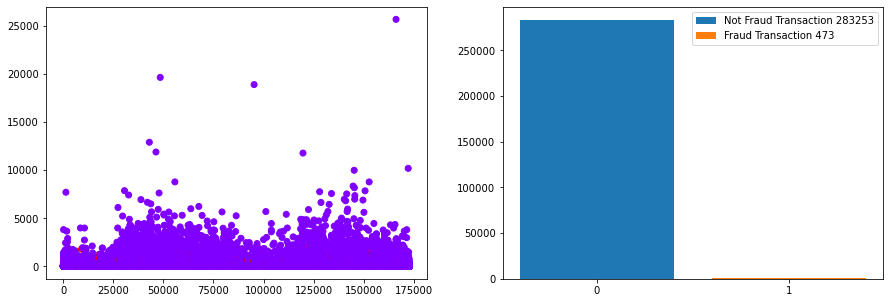

In [6]:
# 03. Plotting scatter and bar chart of data

fig = plt.figure(figsize=(15,5))

# Scatter plot
ax = fig.add_subplot(1,2,1)
ax.scatter(df_final['Time'],df_final['Amount'], c=df_final['Class'], cmap='rainbow')

# Bar chart
ax = fig.add_subplot(1,2,2)
x=df_final['Class'].unique()
y=[]
for i in x:
    y.append(df_final[df_final['Class']== i].Class.count())
    
for j in range(x.size):
    if x[j]==0:
        label = "Not Fraud Transaction "
    elif x[j]==1:
        label = "Fraud Transaction "
    ax.bar(str(x[j]),y[j], label=label+str(y[j]))
    
ax.legend()

plt.show() 

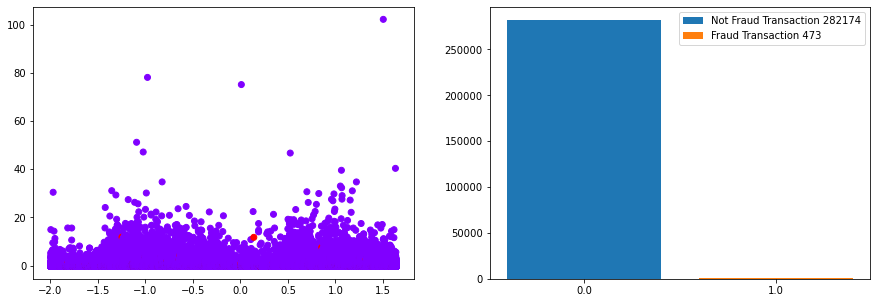

In [7]:
# 04. Standradization of data using StandardScaler

from sklearn.preprocessing import StandardScaler

y_label = df_final['Class']

# Standardizing the features
scaler = StandardScaler()
df_num_std = df_final.copy(deep=True) 
x_features = df_num_std.loc[:, df_num_std.columns != 'Class']
cols = x_features.columns
df_num_std = pd.DataFrame(scaler.fit_transform(x_features), columns = cols)
df_num_std['Class'] = y_label

df_num_std=df_num_std.dropna()

fig = plt.figure(figsize=(15,5))

# Scatter plot
ax = fig.add_subplot(1,2,1)
ax.scatter(df_num_std['Time'],df_num_std['Amount'], c=df_num_std['Class'], cmap='rainbow')

# Bar chart
ax = fig.add_subplot(1,2,2)
x=df_num_std['Class'].unique()
y=[]
for i in x:
    y.append(df_num_std[df_num_std['Class']== i].Class.count())
    
for j in range(x.size):
    if x[j]==0:
        label = "Not Fraud Transaction "
    elif x[j]==1:
        label = "Fraud Transaction "
    ax.bar(str(x[j]),y[j], label=label+str(y[j]))
    
ax.legend()

plt.show() 

# Dataset details after Standardization

display(HTML(df_num_std.describe().to_html()))

In [8]:
# Importing all Classifier, Ensemble, Neural Network and validation classes.

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import (
    f1_score,
    brier_score_loss,
    log_loss,
    roc_auc_score,
    make_scorer, 
    accuracy_score, 
    precision_score, 
    recall_score,
    ConfusionMatrixDisplay
)
from collections import defaultdict

In [9]:
# 05. Defining call_hold_out_validation method to run all the classifier and evaluation methods.

# Declaring Classifer label
names = [
    "Decision Tree",
    "Logistic Regression",
    "Linear SVM",
    "RBF SVM",
    "Random Forest",
    "GradientBoosting Squared Error",
    "HistGradientBoostingClassifier",
    "MLPClassifier Adam 100, 200",
    "MLPClassifier LBFGS 100, 200",
    "MLPClassifier SGD 100, 200"
]

# Defining the classifier with parameters
classifiers = [
    DecisionTreeClassifier(criterion='entropy', max_depth=100, ccp_alpha = 5),
    LogisticRegression(penalty='l2',solver='saga', max_iter=100),
    SVC(kernel="sigmoid", C=0.01, coef0=2.0, max_iter=100, probability=True),
    SVC(gamma='auto', C=0.01,  max_iter=100, probability=True),
    RandomForestClassifier(criterion='entropy', max_depth=100, ccp_alpha = 5, n_estimators=100, random_state=1),
    GradientBoostingClassifier(n_estimators=100, random_state=1, learning_rate=2.0, criterion='squared_error', max_depth=100),
    HistGradientBoostingClassifier(loss='log_loss', learning_rate=2.0, max_iter=100, max_depth=100),
    MLPClassifier(hidden_layer_sizes=(100,200), solver='adam', random_state=1, learning_rate_init=0.002,max_iter=100, warm_start=True),
    MLPClassifier(hidden_layer_sizes=(100,200), solver='lbfgs', random_state=1, max_iter=100, warm_start=True),
    MLPClassifier(hidden_layer_sizes=(100,200), solver='sgd', random_state=1, learning_rate_init=0.002,learning_rate='adaptive', early_stopping=True,max_iter=100, warm_start=True)
   
]

# Method to run each classifer and evaluate scores
def call_hold_out_validation_imbalanced_data(x,y,classifiers,name,scores, i, fig):
    ax = fig.add_subplot(6,2,i)
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.3)
    clf = classifiers 
    clf=clf.fit(x_train, y_train)
    start_time = time.process_time()
    y_pred=clf.predict(x_test)
    end_time = time.process_time()
    y_prob = clf.predict_proba(x_test)
    confM = cm(y_test, y_pred)
   
    
    # Plotting Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        x_test,
       y_test,
        cmap=plt.cm.Blues,
    )
    disp.plot(ax=ax)
    ax.set_title(name)
    
    # Forming score table
    scores["Classifier"].append(name)

    for metric in [brier_score_loss]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_prob[:, 1]))

    for metric in [accuracy_score,precision_score, recall_score, f1_score, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_pred))
    
    scores["Model prediction time"].append(end_time-start_time)
    

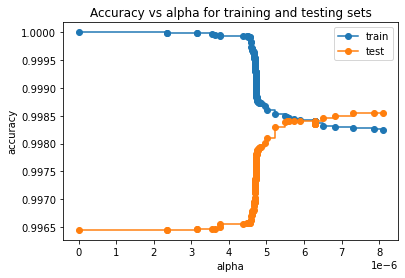

In [10]:
# 06. Finding best ccp_alpha

x_imbalanced=df_num_std.drop('Class',axis=1)
y_imbalanced=df_num_std['Class']

X_train, X_test, y_train, y_test = train_test_split(x_imbalanced, y_imbalanced, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vikas\a

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Brier  loss  Accuracy   Precision    Recall   \
Classifier                                                                     
Decision Tree                      0.001672   0.998325    0.000000  0.000000   
Logistic Regression                0.001671   0.998325    0.000000  0.000000   
Linear SVM                         0.001672   0.993773    0.002577  0.007042   
RBF SVM                            0.001672   0.929843    0.001203  0.049296   
Random Forest                      0.001672   0.998325    0.000000  0.000000   
GradientBoosting Squared Error     0.003691   0.996309    0.000000  0.000000   
HistGradientBoostingClassifier     0.003265   0.996733    0.000000  0.000000   
MLPClassifier Adam 100, 200        0.001970   0.997913    0.027027  0.007042   
MLPClassifier LBFGS 100, 200       0.001672   0.998325    0.000000  0.000000   
MLPClassifier SGD 100, 200         0.001683   0.998325    0.000000  0.000000   

                                     F1   Roc auc   Model prediction time  
Classifier                                                                 
Decision Tree                   0.000000  0.500000               0.000000  
Logistic Regression             0.000000  0.500000               0.000000  
Linear SVM                      0.003774  0.501235               0.843750  
RBF SVM                         0.002348  0.490308               1.781250  
Random Forest                   0.000000  0.500000               0.234375  
GradientBoosting Squared Error  0.000000  0.498990               0.031250  
HistGradientBoostingClassifier  0.000000  0.499203               0.093750  
MLPClassifier Adam 100, 200     0.011173  0.503308               7.359375  
MLPClassifier LBFGS 100, 200    0.000000  0.500000               1.250000  
MLPClassifier SGD 100, 200      0.000000  0.500000               0.906250

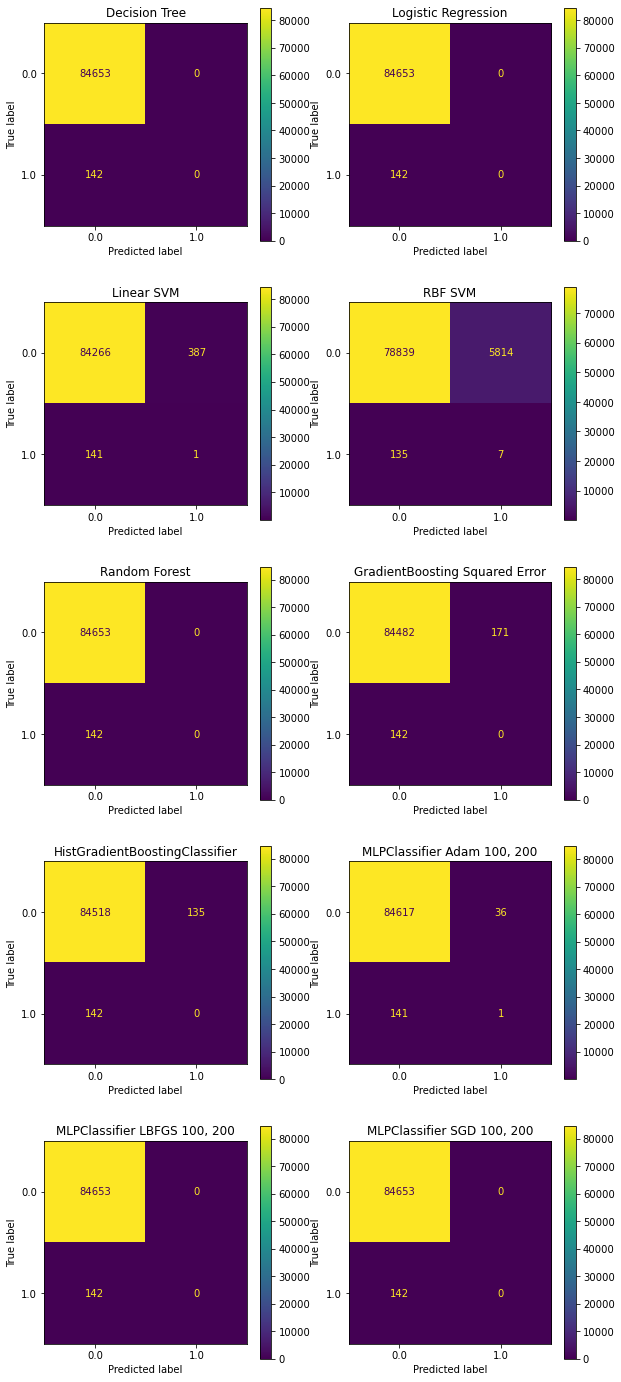

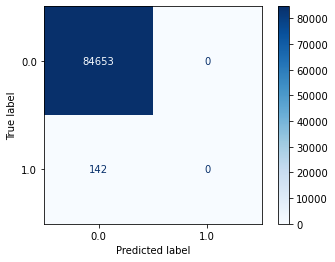

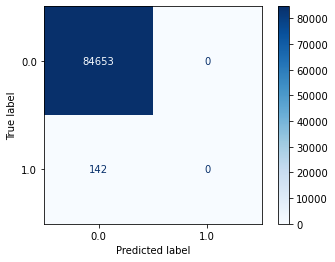

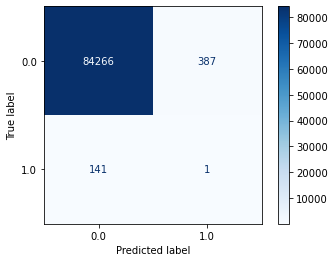

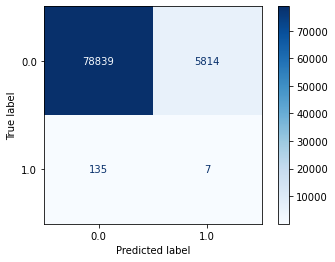

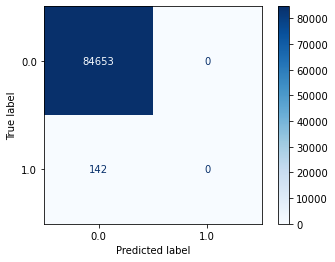

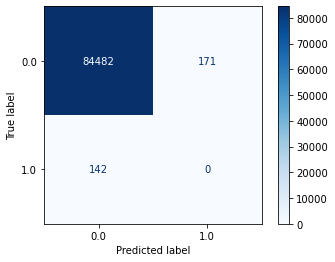

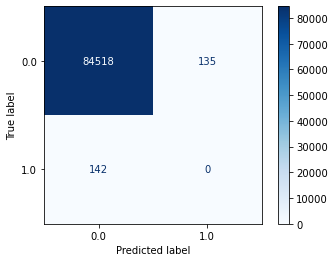

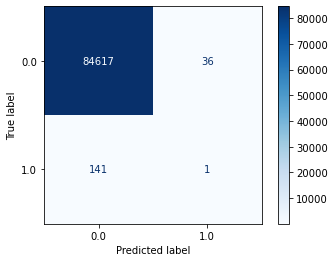

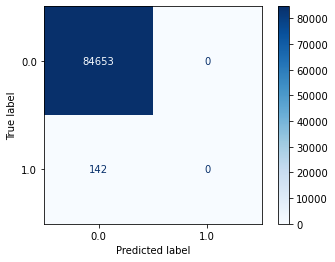

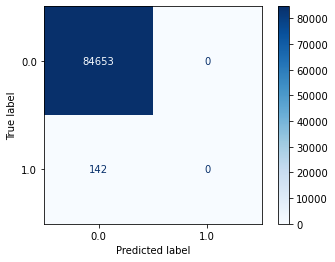

In [11]:
# 07. Run classifers on imbalanced dataset and evaluating each methods.

scores_imbalanced = defaultdict(list)
image=1
fig = plt.figure(figsize=(10,30))
for name,clf in zip(names, classifiers):
    call_hold_out_validation_imbalanced_data(x_imbalanced,y_imbalanced, clf,name, scores_imbalanced, image,fig)
    image+=1

score_df = pd.DataFrame(scores_imbalanced).set_index("Classifier")
score_df.round(decimals=3)
score_df

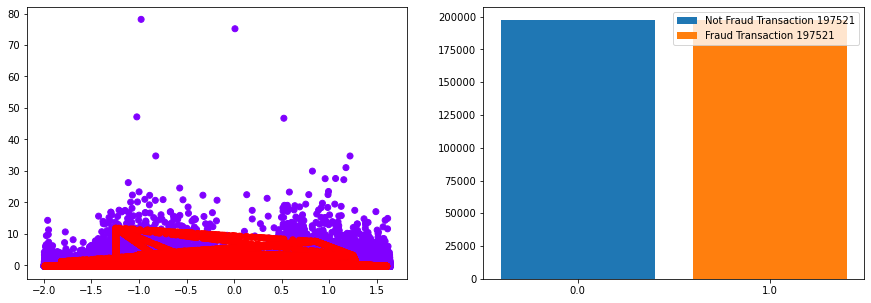

In [12]:
# 08. Perform over-sampling using SMOTE on imbalanced dataset

from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(x_imbalanced, y_imbalanced, stratify=y_imbalanced,test_size=0.3)

sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

df_smote = x_train_smote.join(y_train_smote)
fig = plt.figure(figsize=(15,5))

# Scatter plot after SMOTE
ax = fig.add_subplot(1,2,1)
ax.scatter(df_smote['Time'],df_smote['Amount'], c=df_smote['Class'] , cmap='rainbow')

# Bar chart after SMOTE
ax = fig.add_subplot(1,2,2)
i=df_smote['Class'].unique()
j=[]
for k in i:
    j.append(df_smote[df_smote['Class']== k].Class.count())
    
for l in range(i.size):
    if i[l]==0:
        label = "Not Fraud Transaction "
    elif i[l]==1:
        label = "Fraud Transaction "
    ax.bar(str(i[l]),j[l], label=label+str(j[l]))
    
ax.legend()

plt.show() 


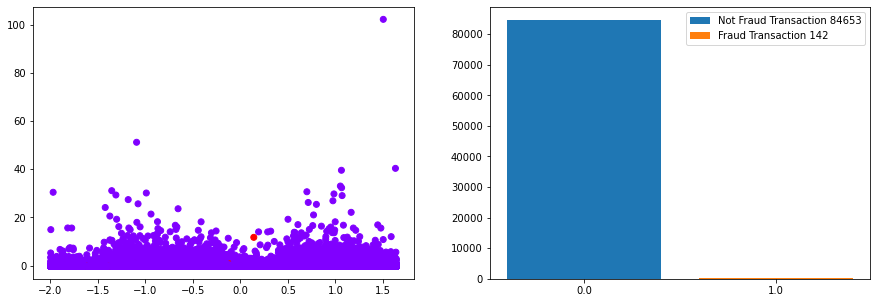

In [13]:
df_test = x_test.join(y_test)
fig = plt.figure(figsize=(15,5))

# Scatter plot after SMOTE
ax = fig.add_subplot(1,2,1)
ax.scatter(df_test['Time'],df_test['Amount'], c=df_test['Class'] , cmap='rainbow')

# Bar chart after SMOTE
ax = fig.add_subplot(1,2,2)
i=df_test['Class'].unique()
j=[]
for k in i:
    j.append(df_test[df_test['Class']== k].Class.count())
    
for l in range(i.size):
    if i[l]==0:
        label = "Not Fraud Transaction "
    elif i[l]==1:
        label = "Fraud Transaction "
    ax.bar(str(i[l]),j[l], label=label+str(j[l]))
    
ax.legend()

plt.show()

In [14]:
# Method to run each classifer and evaluate scores
def call_hold_out_validation_minority_oversampled_data(x_train,y_train,x_test,y_test,classifiers,name,scores, i, fig):
    ax = fig.add_subplot(5,2,i)
    clf = classifiers 
    clf=clf.fit(x_train, y_train)
    start_time = time.process_time()
    y_pred=clf.predict(x_test)
    end_time = time.process_time()
    y_prob = clf.predict_proba(x_test)
    confM = cm(y_test, y_pred)
   
    
    # Plotting Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        x_test,
       y_test,
        cmap=plt.cm.Blues,
    )
    disp.plot(ax=ax)
    ax.set_title(name)
    
    # Forming score table
    scores["Classifier"].append(name)

    for metric in [brier_score_loss]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_prob[:, 1]))

    for metric in [accuracy_score,precision_score, recall_score, f1_score, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_pred))
    
    scores["Model prediction time"].append(end_time-start_time)

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: Undefine

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Brier  loss  Accuracy   Precision    Recall   \
Classifier                                                                     
Decision Tree                      0.250000   0.998325    0.000000  0.000000   
Logistic Regression                0.223241   0.673778    0.002639  0.514085   
Linear SVM                         0.250000   0.987841    0.002240  0.014085   
RBF SVM                            0.010106   0.989009    0.000000  0.000000   
Random Forest                      0.249970   0.998325    0.000000  0.000000   
GradientBoosting Squared Error     0.012332   0.987287    0.003185  0.021127   
HistGradientBoostingClassifier     0.193199   0.733675    0.002351  0.373239   
MLPClassifier Adam 100, 200        0.016176   0.978631    0.023945  0.295775   
MLPClassifier LBFGS 100, 200       0.017251   0.978136    0.004630  0.056338   
MLPClassifier SGD 100, 200         0.077173   0.891350    0.003068  0.197183   

                                     F1   Roc auc   Model prediction time  
Classifier                                                                 
Decision Tree                   0.000000  0.500000               0.000000  
Logistic Regression             0.005250  0.594065               0.000000  
Linear SVM                      0.003865  0.501780               0.953125  
RBF SVM                         0.000000  0.495334               1.828125  
Random Forest                   0.000000  0.500000               0.187500  
GradientBoosting Squared Error  0.005535  0.505017               0.062500  
HistGradientBoostingClassifier  0.004672  0.553760               0.234375  
MLPClassifier Adam 100, 200     0.044304  0.637775               4.796875  
MLPClassifier LBFGS 100, 200    0.008556  0.518010               0.625000  
MLPClassifier SGD 100, 200      0.006042  0.544849               1.078125

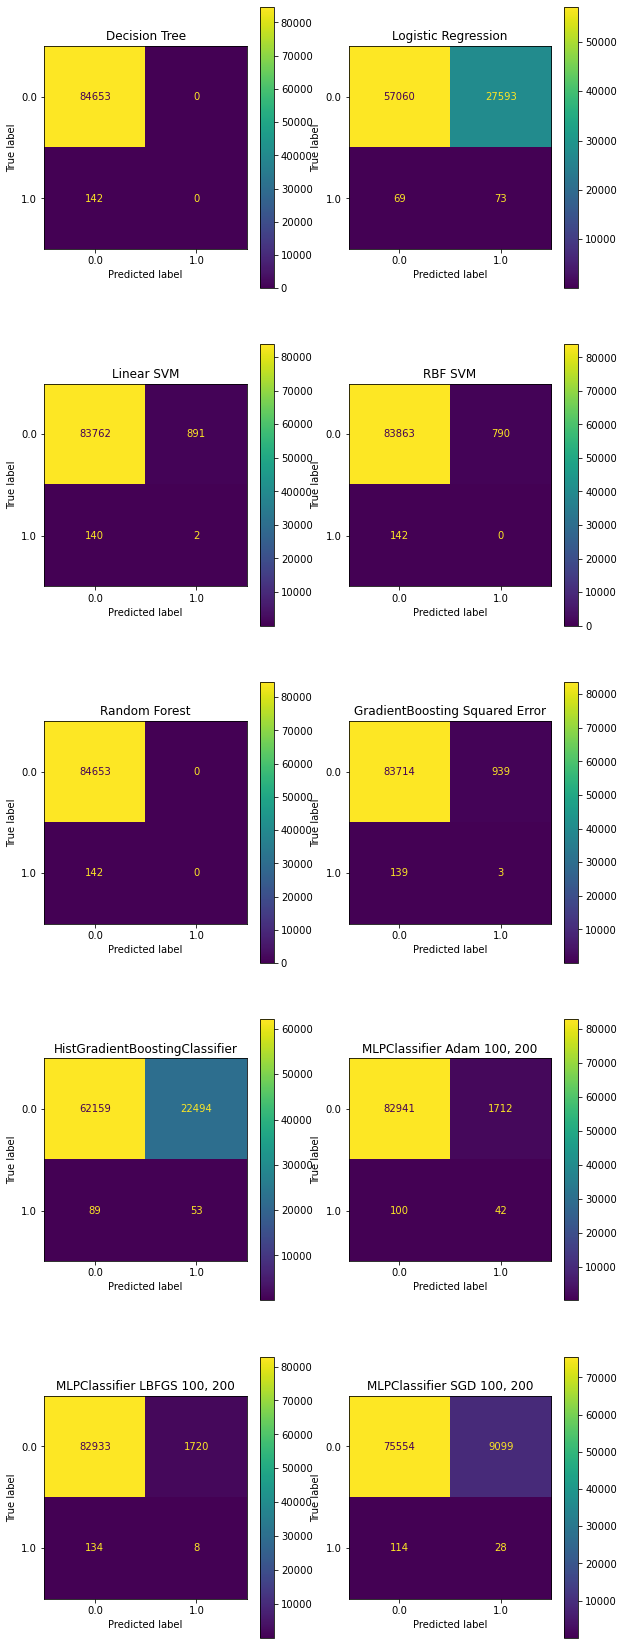

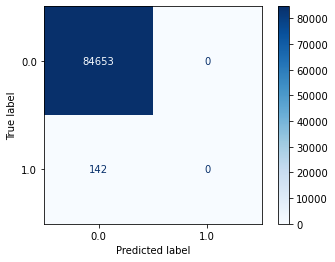

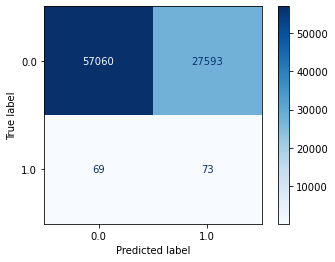

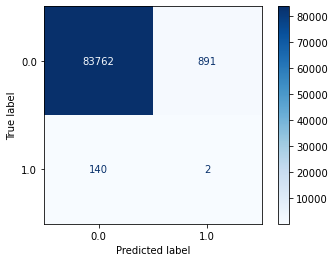

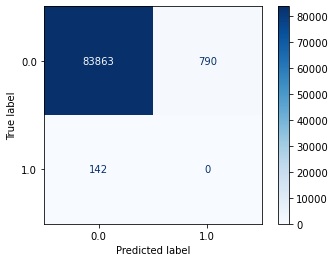

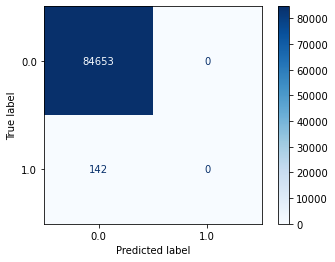

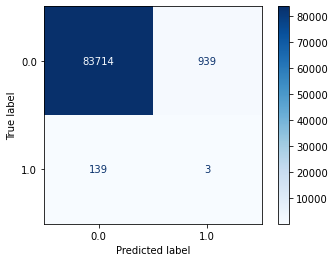

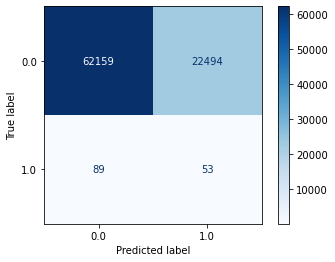

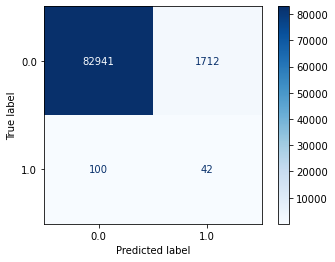

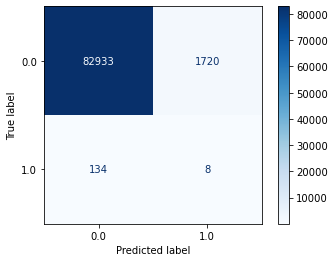

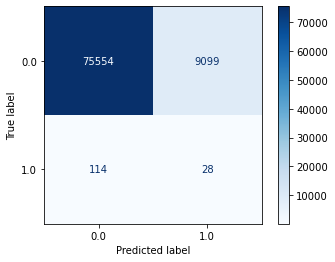

In [15]:
# 09. Run classifers on dataset after SMOTE and evaluating each methods.

scores_smote = defaultdict(list)

image=1
fig = plt.figure(figsize=(10,30))
for name,clf in zip(names, classifiers):
    call_hold_out_validation_minority_oversampled_data(x_train_smote,y_train_smote, x_test, y_test,clf,name, scores_smote, image, fig)
    image+=1

score_df_smote = pd.DataFrame(scores_smote).set_index("Classifier")
score_df_smote.round(decimals=3)
score_df_smote

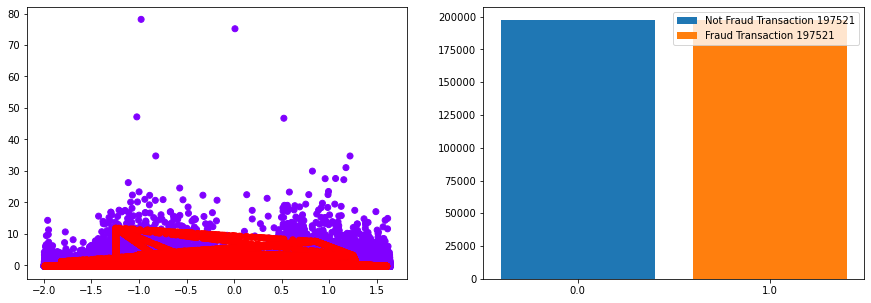

In [16]:
from  imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state=42)
x_train_smote_KMeans, y_train_smote_KMeans = sm.fit_resample(x_train, y_train)

df_smote_KMeans = x_train_smote_KMeans.join(y_train_smote_KMeans)
fig = plt.figure(figsize=(15,5))

# Scatter plot after SMOTE
ax = fig.add_subplot(1,2,1)
ax.scatter(df_smote_KMeans['Time'],df_smote_KMeans['Amount'], c=df_smote_KMeans['Class'] , cmap='rainbow')

# Bar chart after SMOTE
ax = fig.add_subplot(1,2,2)
i=df_smote_KMeans['Class'].unique()
j=[]
for k in i:
    j.append(df_smote_KMeans[df_smote_KMeans['Class']== k].Class.count())
    
for l in range(i.size):
    if i[l]==0:
        label = "Not Fraud Transaction "
    elif i[l]==1:
        label = "Fraud Transaction "
    ax.bar(str(i[l]),j[l], label=label+str(j[l]))
    
ax.legend()

plt.show() 

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: Undefine

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Brier  loss  Accuracy   Precision    Recall   \
Classifier                                                                     
Decision Tree                      0.250000   0.998325    0.000000  0.000000   
Logistic Regression                0.223241   0.673778    0.002639  0.514085   
Linear SVM                         0.292967   0.987841    0.002240  0.014085   
RBF SVM                            0.019574   0.989009    0.000000  0.000000   
Random Forest                      0.249970   0.998325    0.000000  0.000000   
GradientBoosting Squared Error     0.012332   0.987287    0.003185  0.021127   
HistGradientBoostingClassifier     0.201764   0.742957    0.002115  0.323944   
MLPClassifier Adam 100, 200        0.011455   0.985294    0.016623  0.133803   
MLPClassifier LBFGS 100, 200       0.008811   0.989091    0.003802  0.021127   
MLPClassifier SGD 100, 200         0.033275   0.954408    0.003731  0.098592   

                                     F1   Roc auc   Model prediction time  
Classifier                                                                 
Decision Tree                   0.000000  0.500000               0.015625  
Logistic Regression             0.005250  0.594065               0.000000  
Linear SVM                      0.003865  0.501780               0.656250  
RBF SVM                         0.000000  0.495334               1.781250  
Random Forest                   0.000000  0.500000               0.328125  
GradientBoosting Squared Error  0.005535  0.505017               0.093750  
HistGradientBoostingClassifier  0.004203  0.533802               0.234375  
MLPClassifier Adam 100, 200     0.029572  0.560263               7.171875  
MLPClassifier LBFGS 100, 200    0.006445  0.505921               0.796875  
MLPClassifier SGD 100, 200      0.007191  0.527217               1.234375

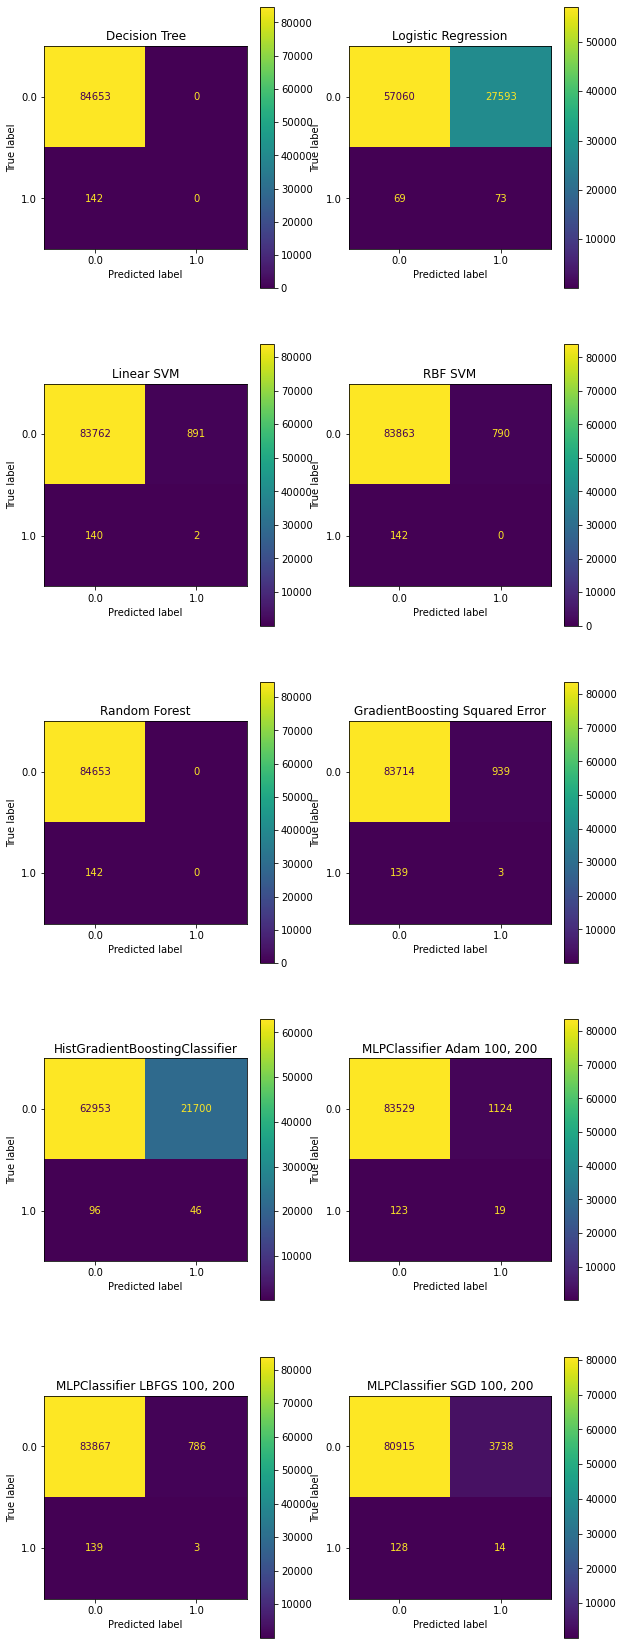

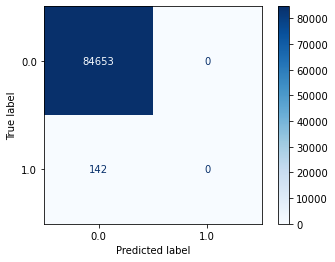

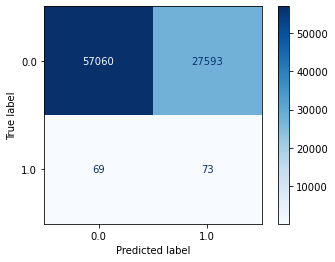

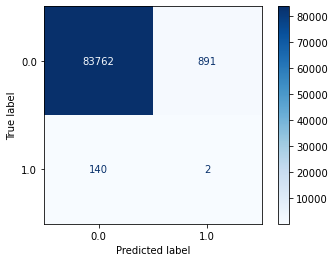

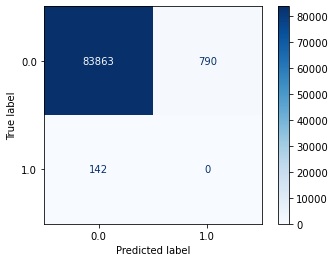

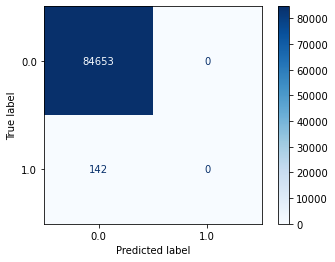

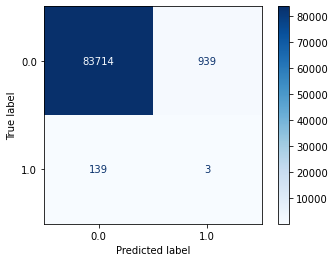

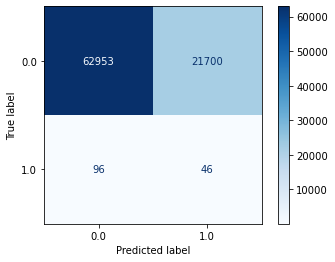

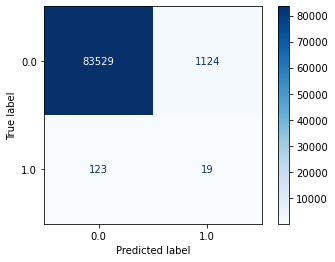

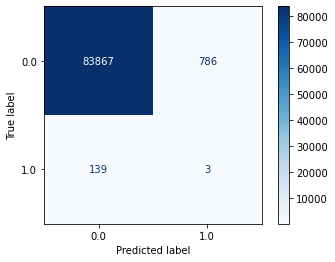

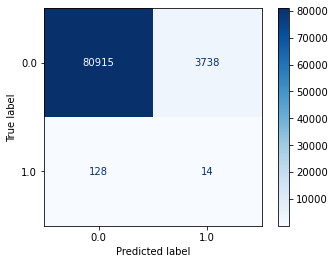

In [17]:
# 10. Run classifers on dataset after KMeansSMOTE and evaluating each methods.

scores_smote_KMeans = defaultdict(list)

image=1
fig = plt.figure(figsize=(10,30))
for name,clf in zip(names, classifiers):
    call_hold_out_validation_minority_oversampled_data(x_train_smote_KMeans,y_train_smote_KMeans, x_test, y_test,clf,name, scores_smote_KMeans, image, fig)
    image+=1

score_df_smote_KMeans = pd.DataFrame(scores_smote_KMeans).set_index("Classifier")
score_df_smote_KMeans.round(decimals=3)
score_df_smote_KMeans

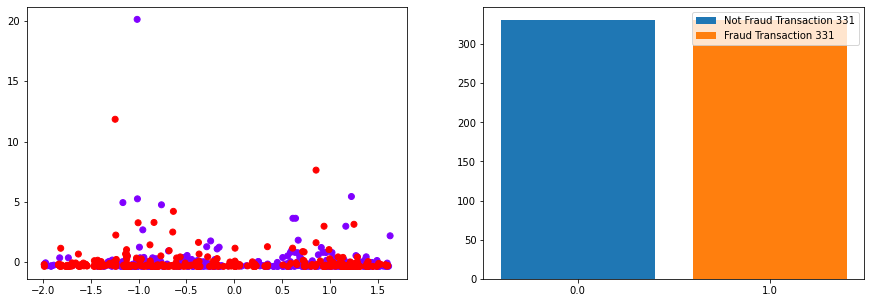

In [18]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
x_train_RUS, y_train_RUS = under_sampler.fit_resample(x_train, y_train)

df_RUS = x_train_RUS.join(y_train_RUS)
fig = plt.figure(figsize=(15,5))

# Scatter plot after SMOTE
ax = fig.add_subplot(1,2,1)
ax.scatter(df_RUS['Time'],df_RUS['Amount'], c=df_RUS['Class'] , cmap='rainbow')

# Bar chart after SMOTE
ax = fig.add_subplot(1,2,2)
i=df_RUS['Class'].unique()
j=[]
for k in i:
    j.append(df_RUS[df_RUS['Class']== k].Class.count())
    
for l in range(i.size):
    if i[l]==0:
        label = "Not Fraud Transaction "
    elif i[l]==1:
        label = "Fraud Transaction "
    ax.bar(str(i[l]),j[l], label=label+str(j[l]))
    
ax.legend()

plt.show() 

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Brier  loss  Accuracy   Precision    Recall   \
Classifier                                                                     
Decision Tree                      0.250000   0.998325    0.000000  0.000000   
Logistic Regression                0.237233   0.663695    0.002594  0.521127   
Linear SVM                         0.221464   0.003632    0.001666  0.992958   
RBF SVM                            0.266428   0.353087    0.001603  0.619718   
Random Forest                      0.250105   0.001675    0.001675  1.000000   
GradientBoosting Squared Error     0.454323   0.535586    0.002056  0.570423   
HistGradientBoostingClassifier     0.422429   0.553169    0.001926  0.514085   
MLPClassifier Adam 100, 200        0.013766   0.982629    0.016000  0.154930   
MLPClassifier LBFGS 100, 200       0.138794   0.847998    0.002886  0.260563   
MLPClassifier SGD 100, 200         0.053220   0.927012    0.003449  0.147887   

                                     F1   Roc auc   Model prediction time  
Classifier                                                                 
Decision Tree                   0.000000  0.500000               0.000000  
Logistic Regression             0.005163  0.592530               0.015625  
Linear SVM                      0.003327  0.497465               0.781250  
RBF SVM                         0.003198  0.486179               1.515625  
Random Forest                   0.003344  0.500000               0.265625  
GradientBoosting Squared Error  0.004097  0.552975               0.015625  
HistGradientBoostingClassifier  0.003839  0.533660               1.078125  
MLPClassifier Adam 100, 200     0.029005  0.569473               4.859375  
MLPClassifier LBFGS 100, 200    0.005709  0.554773               0.671875  
MLPClassifier SGD 100, 200      0.006740  0.538103               0.765625

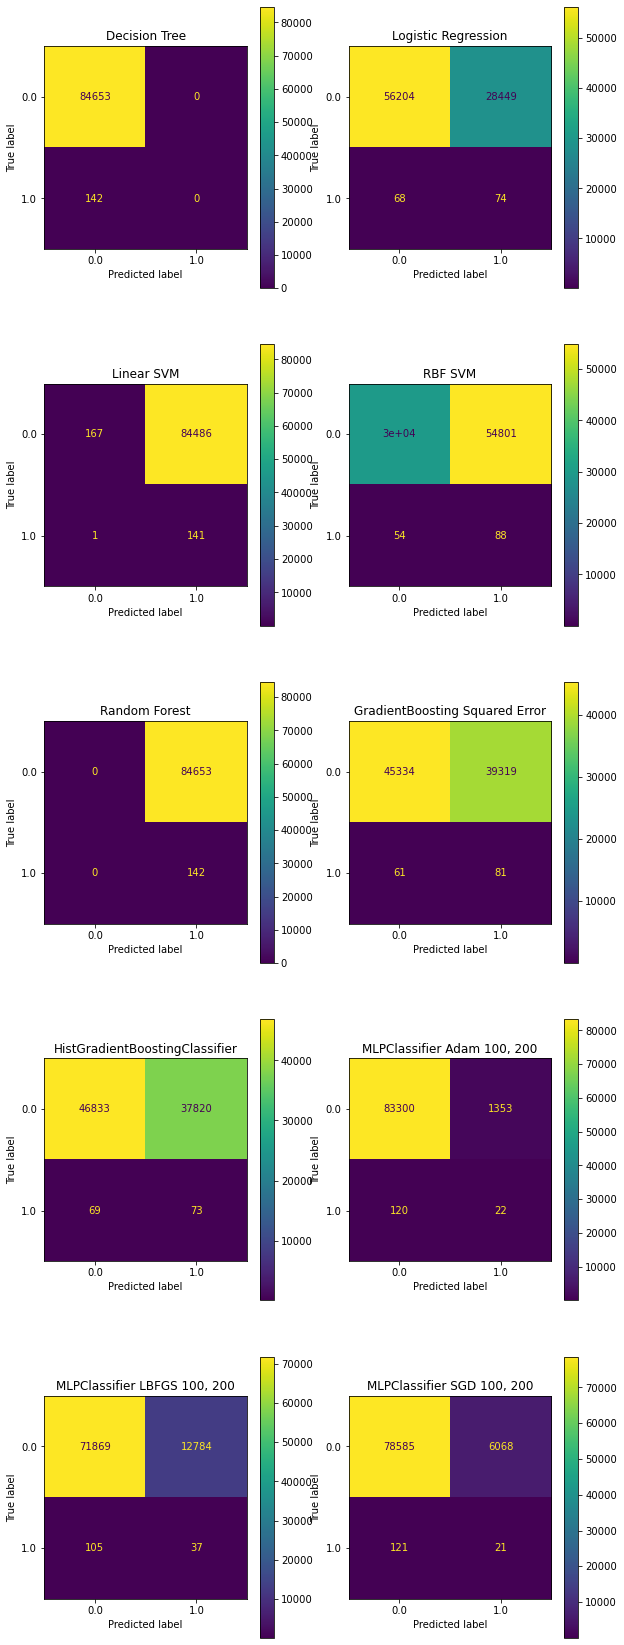

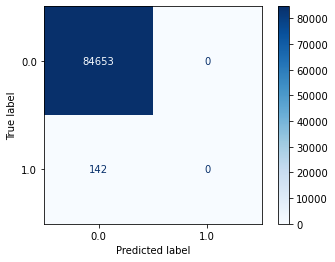

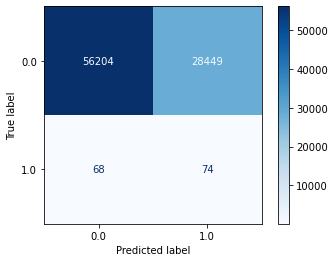

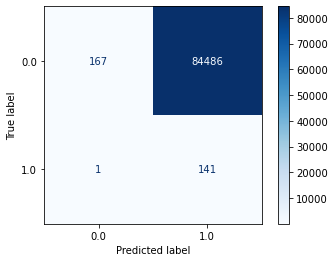

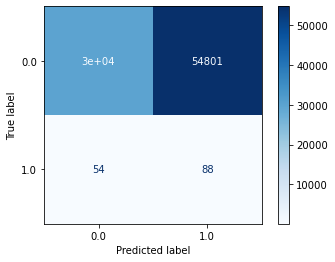

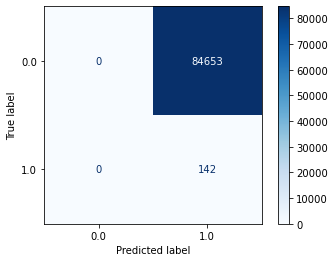

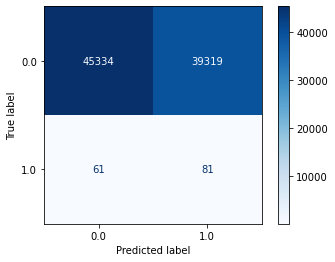

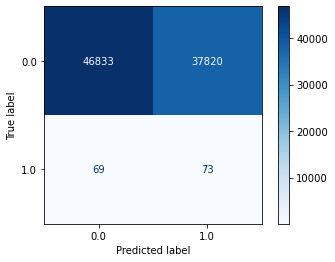

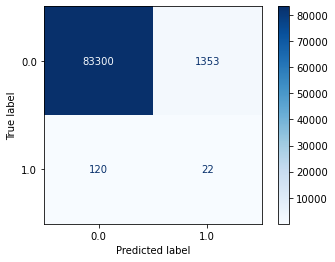

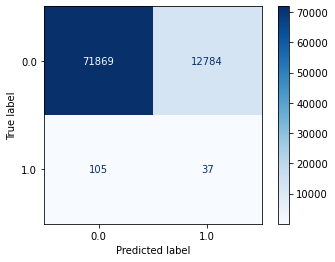

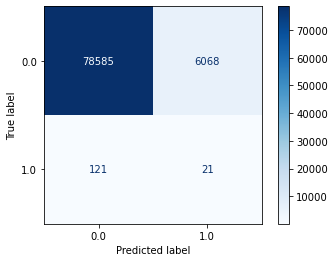

In [19]:
# 11. Run classifers on dataset after Random Under Sampling and evaluating each methods.

scores_RUS = defaultdict(list)

image=1
fig = plt.figure(figsize=(10,30))
for name,clf in zip(names, classifiers):
    call_hold_out_validation_minority_oversampled_data(x_train_RUS,y_train_RUS, x_test, y_test,clf,name, scores_RUS, image, fig)
    image+=1

score_df_RUS = pd.DataFrame(scores_RUS).set_index("Classifier")
score_df_RUS.round(decimals=3)
score_df_RUS

In [20]:
# 10. Finding best K value for KMeans clustering

# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.cluster import KMeans

# df_knn=x_smote.copy(deep=True) 

# Sum_of_squared_distances = []
# K = range(1, 50)
# for k in K:
    # km = KMeans(n_clusters=k)
    # km = km.fit(x_smote)
    # Sum_of_squared_distances.append(km.inertia_)
    
# In the plot, the elbow on the arm is optimal k
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method for Optimal k')
# plt.show()

In [21]:
# 11. Run classifers on clustered dataset and evaluating each methods.

# From Elbow method for Optimal K based on sum of squared distances chose optimal K as 25
# df_cluster25=x_smote.copy(deep=True)

# Running KMeans clustering with cluster value K as 25.
# kmeans=KMeans(n_clusters=25, init='k-means++', random_state=1,max_iter=1000)
# kmeans.fit(x_smote)
# opt=kmeans.labels_
# df_cluster25['Cluster']=opt

# Running classifers
# scores_smote_cluster = defaultdict(list)

# image=1
# fig = plt.figure(figsize=(10,25))
# for name,clf in zip(names, classifiers):
    # call_hold_out_validation(df_cluster25,y_smote, clf,name, scores_smote_cluster, image, fig)
    # image+=1

# score_df_smote_cluster = pd.DataFrame(scores_smote_cluster).set_index("Classifier")
# score_df_smote_cluster.round(decimals=3)
# score_df_smote_cluster